In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn

# Load the dataset

In [ ]:
true_dataset = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_dataset = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [ ]:
true_dataset.shape

In [ ]:
true_dataset.info()

In [ ]:
true_dataset.head()

In [ ]:
fake_dataset.shape

In [ ]:
fake_dataset.info()

In [ ]:
fake_dataset.head()

In [ ]:
true_dataset["label"] = np.ones(true_dataset.shape[0], dtype=int)
true_dataset.head()

In [ ]:
fake_dataset["label"] = np.zeros(fake_dataset.shape[0], dtype=int)
fake_dataset.head()

In [ ]:
dataset = pd.concat((true_dataset, fake_dataset), axis=0)
dataset.info()

In [ ]:
dataset = dataset.sample(frac=1)
dataset.head()

In [ ]:
sns.countplot(dataset['label'])
plt.show()

In [ ]:
dataset['subject'].value_counts()

In [ ]:
df = pd.get_dummies(dataset, columns=["subject"])
df.head()

In [ ]:
df = df.drop('date', axis=1)
df.info()

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Preprocess the data

In [ ]:
def preprocess(data):
  pattern = "[^a-zA-Z]"
  lemmatizer = WordNetLemmatizer()
  new = []
  for txt in data:
    txt = txt.lower()
    txt = re.sub(pattern, " ", txt)
    txt = word_tokenize(txt)
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = " ".join(txt)
    new.append(txt)
  return new

In [ ]:
text_new = preprocess(df.text)
text_new[0]

In [ ]:
title_new = preprocess(df.title)
title_new[0]

In [ ]:
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)

title_vector = title_vectorizer.fit_transform(title_new).toarray() 
text_vector = text_vectorizer.fit_transform(text_new).toarray()

In [ ]:
df.head()

In [ ]:
df.drop(["title","text"],axis=1, inplace=True)
df.info()

In [ ]:
print(df.shape)
print(title_vector.shape)
print(text_vector.shape)

In [ ]:
X = np.concatenate((np.array(df.drop("label", axis=1)), title_vector, text_vector), axis=1)
y = df['label']

In [ ]:
print(X.shape)
print(y.shape)

# Divide the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Logistic Regression

It models the probabilities of classification problem with two possible outcomes. it value ranges from 0 to 1. The logistic function is defind as - 

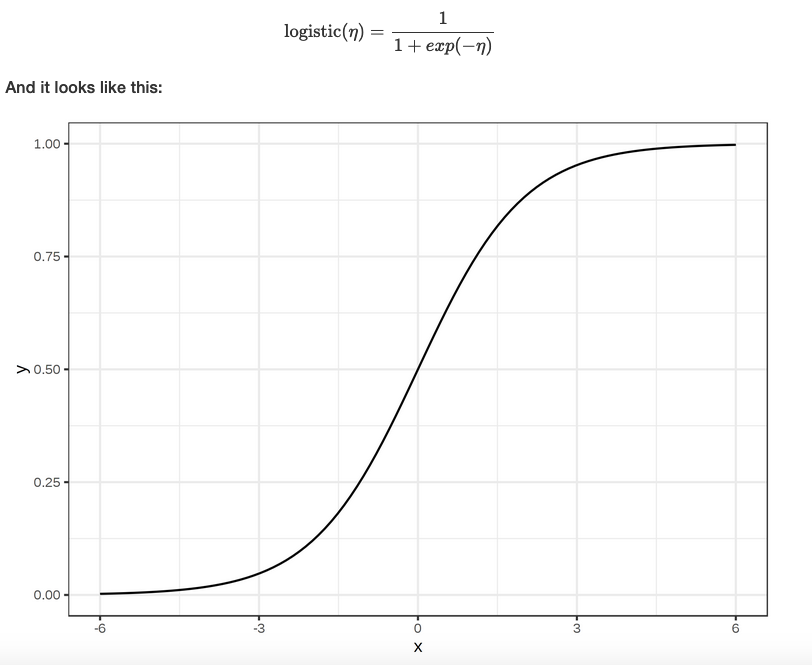

In [ ]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy: %0.3f" %(lr_acc*100))

plot_confusion_matrix(lr_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

# cm = confusion_matrix(y_test, lr_pred)
# sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2%')
# plt.show()

In [ ]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.show()

# Decision Tree Classifier

it uses a tree like structure and their possible combinations to solve a particular problem.

A decision tree consists of a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

While implementing the Decision-Tree algorithm, We make following assumptions -

* At the beginning, the whole training set is considered as the root.
* Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

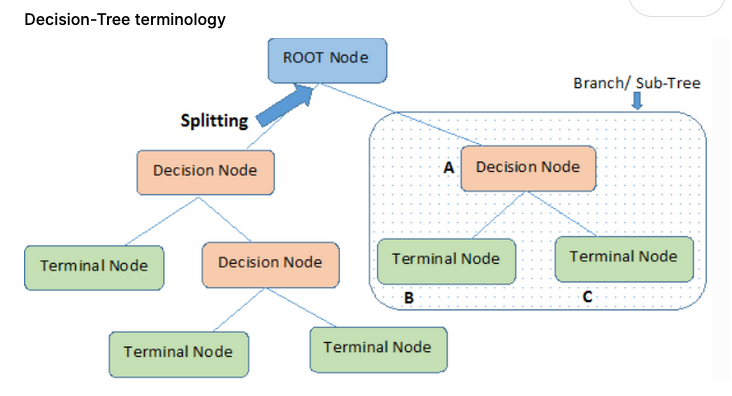


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy: %0.3f" %(dt_acc*100))

plot_confusion_matrix(dt_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(dt_model, X_test, y_test)
plt.show()

# Random Forest Classifier

Random forest is made up of several trees & select the best soluction democratically (by voting).

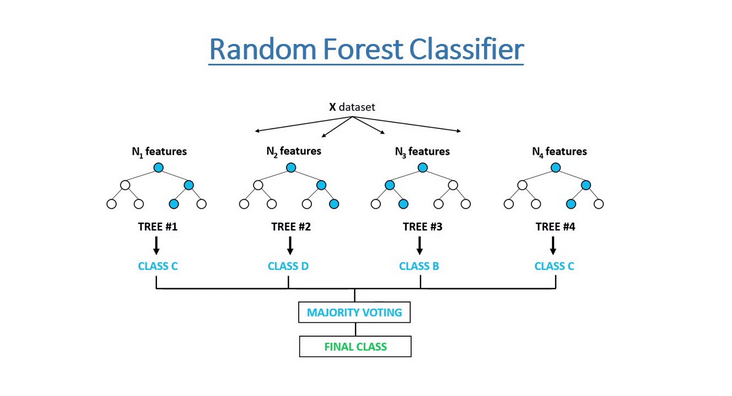

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(rf_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(rf_model, X_test, y_test)
plt.show()

# Naive Bayes

Niave bayes assumes that all the features are independent. it uses the Baye's algorithm to predict probabilities of each class.

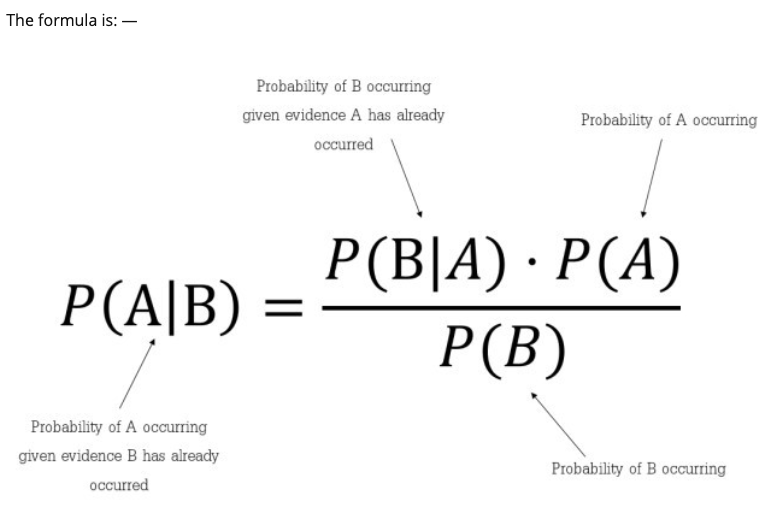

* Gaussian Naive Bayes
* Multinomial Naive Bayes

In [ ]:
nbc_model = MultinomialNB()
nbc_model.fit(X_train, y_train)
nbc_pred = nbc_model.predict(X_test)

nbc_acc = accuracy_score(y_test, nbc_pred)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(nbc_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(nbc_model, X_test, y_test)
plt.show()

In [ ]:
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mnb_acc = []
for alpha in alpha_values:
    nbc_model_a = MultinomialNB(alpha)
    nbc_model_a.fit(X_train, y_train)
    nbc_a_pred = nbc_model_a.predict(X_test)
    acc = accuracy_score(y_test, nbc_a_pred)
    mnb_acc.append(acc)
    print(f'alpha: {alpha}, accuracy : {acc*100}')

sns.lineplot(alpha_values, mnb_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

# ANN

Artificial Neural Network is a multi-layer fully connected neural network that consists of an input layer, multiple hidden layer, and an output layer. Every node in a layer is connected to every other node in the next layer.

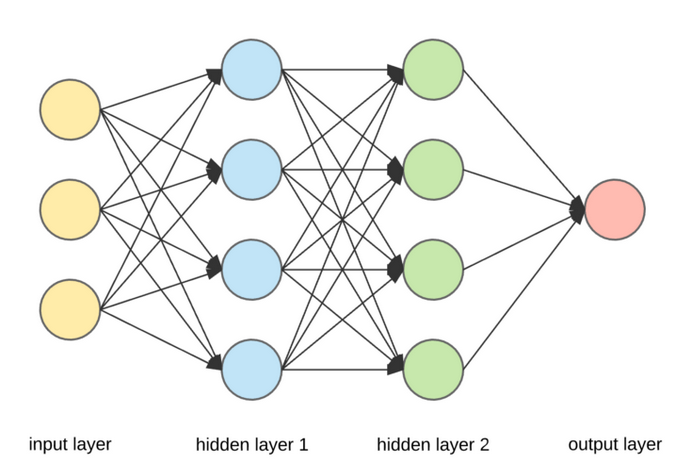


Each node works like this. 
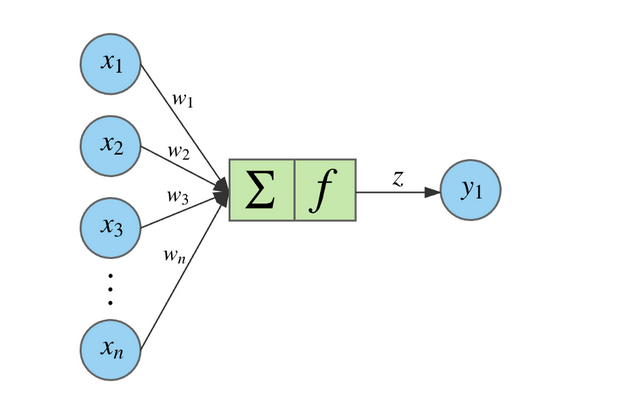

## Activation Layer
the activation function of a node defines the output of that node given an input or set of inputs. perform a transformation on the input received, in order to keep values within a manageable range.
### ReLu

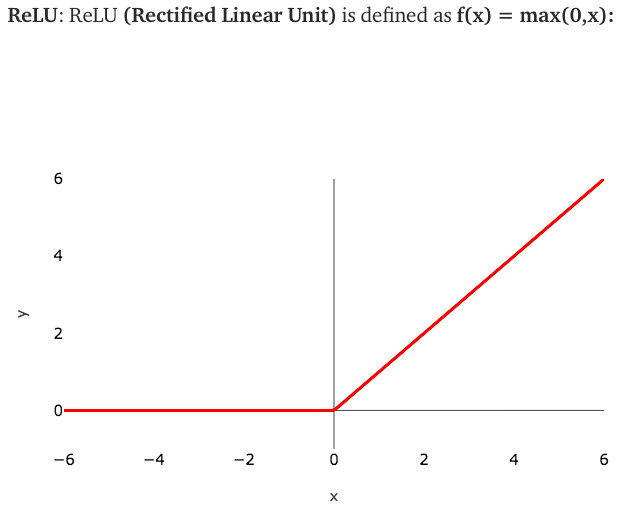

## Dropout Layer

Dropout layer is used to prevent overfitting. dropout means ingore these units. those units wont be considered for forward & backward pass.

In [ ]:
class Simple_Net(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net,self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        
        return out
    

model = Simple_Net()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

In [ ]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 20

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch}, Loss : {loss}')

plt.plot(losses)

In [ ]:
y_hat = model(X_test)
y_pred = torch.max(y_hat, 1)[1] # Convert pred into labels
nn_acc = accuracy_score(y_pred, y_test)
print(f'accuracy : {nn_acc*100}%')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

### Experiment

**HyperParameter Tuning** - is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. for example learning rate, batch size

**Overfitting** - When out model performs poor on unseen data, means gives high accuracy on train data but less accuracy on test data, that is called as overfitting.

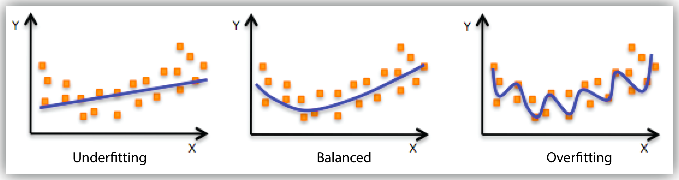


In [ ]:
class Simple_Net1(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net1, self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 50)
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(50, 10)
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(10, 2)

        self.dropout = nn.Dropout(0.1)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        # out = self.dropout(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        out = self.relu5(out)

        out = self.linear6(out)
        
        return out
    

model_1 = Simple_Net1()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)
# y_train = torch.Tensor(y_train.type(torch.FloatTensor))

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 50

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model_1(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch+1}, Loss : {loss}')

y_hat = model_1(X_test)
y_pred = torch.max(y_hat,1)[1] # Convert pred into labels

nn_acc_4_hl = accuracy_score(y_pred, y_test)
print(f'accuracy on 4 hidden layer : {nn_acc_4_hl}')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

Experimented with many hidden layers & changing hyperparameters like learning rate, batchsize. also tried adding dropout layer. But the current network architecure gives best accuracy.

# Model Accuracies

In [ ]:
models_accuracies = pd.DataFrame([["Logistic Regression", lr_acc], ["Naive Bayes", nbc_acc], ["Decision Tree", dt_acc],
                       ["Random Forest", rf_acc], ["Simple ANN", nn_acc], ["Modified ANN", nn_acc_4_hl]], columns=["Model", "Accuracy"])
models_accuracies

In [ ]:
x = ['LR', 'DT', 'RF', 'NB', 'ANN', 'M-ANN']
y = [lr_acc, dt_acc, rf_acc, nbc_acc, nn_acc, nn_acc_4_hl]
sns.barplot(x, y)
plt.show()

## My Contribution

I have followed [this](https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98) to understand but visualised & implemented on my own. I also trined & checked accuracy on Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes (Multinomial NB) models.

## Challanges & solutions

Text preprocessing was a major challange. then implementing & finding good accurcy on different models was a challange too. 

Went through many articles to understand text preprocessing & for finding good accuracy.



## References

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98

http://datamine.unc.edu/jupyter/notebooks/Text%20Mining%20Modules/(1)%20Text%20Preprocessing.ipynb

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

https://christophm.github.io/interpretable-ml-book/logistic.html

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://en.wikipedia.org/wiki/Activation_function

https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

https://www.kaggle.com/akarsh1/fakenews-classification-using-ml-and-deep-learning

https://www.kaggle.com/sukanyabag/fake-news-classifiernlp

https://www.kaggle.com/pinkychauhan/fakenewsclassifierusingnltk-sklearn

https://www.kaggle.com/gokulzuzumaki/nlp-for-beginners-vectorizers-and-classifiers